In [1]:
!pip install fastai

  Stored in directory: /root/.cache/pip/wheels/48/5d/04/22361a593e70d23b1f7746d932802efe1f0e523376a74f321e
Successfully built wrapt
spacy 2.0.18 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
  Found existing installation: wrapt 1.11.1
    Uninstalling wrapt-1.11.1:
      Successfully uninstalled wrapt-1.11.1


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *
from os import rmdir
from shutil import rmtree
from PIL import Image
from os import remove

In [0]:
#Definimos nombres de la carpetas donde estará nuestras imagenes.
folders = ['hotdog','hamburguesa','pizza','sanduche']
files = ['hotdog.txt','hamburguesa.txt','pizza.txt','sanduche.txt']


In [0]:
#Vamos a proceder a crear la ruta donde queremos que se almacene las imagenes.
path = Path('data')
dest = ''
existe =false



In [39]:
#Se descarga de forma automatizada las imagenes
#Arriba se crea una lista con nuestras categorias a descargar
for folder in folders:
  dest = path/folder
  print(dest)
  existe = os.path.isfile(dest)
  if existe :
    rmtree(dest)
  dest.mkdir(parents=True, exist_ok=True)
  for file in files:
    print(file)
    if file[:-4] == folder:
      download_images(path/file, dest, max_pics=200)
      

data/hotdog
hotdog.txt


Error https://www.shawarma.minsmedia.com.ng/wp-content/uploads/2018/09/hotdog-grid-uproxx.jpg HTTPSConnectionPool(host='www.shawarma.minsmedia.com.ng', port=443): Max retries exceeded with url: /wp-content/uploads/2018/09/hotdog-grid-uproxx.jpg (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7f138a662b70>: Failed to establish a new connection: [Errno -2] Name or service not known',))
Error https://www.omahasteaks.com/gifs/big/fr032a.jpg HTTPSConnectionPool(host='www.omahasteaks.com', port=443): Read timed out. (read timeout=4)
hamburguesa.txt
pizza.txt
sanduche.txt
data/hamburguesa
hotdog.txt
hamburguesa.txt


Error https://hamburguesacasera.com/wp-content/uploads/2017/05/hamburguesa-carne-vapor.jpg ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response',))
Error https://www.cocinacaserayfacil.net/wp-content/uploads/2017/09/hamburguesa-casera-rellena-de-queso.jpg ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response',))
Error https://www.runners.es/media/cache/big/upload/images/article/16309/article-como-preparar-la-hamburguesa-ideal-5994156b281c5.jpg HTTPSConnectionPool(host='www.runners.es', port=443): Max retries exceeded with url: /media/cache/big/upload/images/article/16309/article-como-preparar-la-hamburguesa-ideal-5994156b281c5.jpg (Caused by SSLError(CertificateError("hostname 'www.runners.es' doesn't match either of 'mailconfig.ovh.net', 'www.mailconfig.ovh.net'",),))
Error https://www.cocinacaserayfacil.net/wp-content/uploads/2017/11/hamburguesa-de-nugget.jpg ('Connection aborted.', RemoteDisconnected('Remote en

Error https://www.feedlatino.net/wp-content/uploads/2019/02/BFV36537_CC2017_2IngredintDough4Ways-FB.jpg ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response',))
Error https://www.hungryhowies.com/sites/default/files/styles/menu_item_280x175/public/images/menu-items/thumbnails/01._build_your_own_pizza_0.png?itok=JwtE20s8 HTTPSConnectionPool(host='www.hungryhowies.com', port=443): Max retries exceeded with url: /sites/default/files/styles/menu_item_280x175/public/images/menu-items/thumbnails/01._build_your_own_pizza_0.png?itok=JwtE20s8 (Caused by SSLError(SSLError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:847)'),))
Error http://pizzadictos.com/wp-content/uploads/2018/01/pizza-peperonni.png HTTPConnectionPool(host='pizzadictos.com', port=80): Max retries exceeded with url: /wp-content/uploads/2018/01/pizza-peperonni.png (Caused by ReadTimeoutError("HTTPConnectionPool(host='pizzadictos.com', port=80): Read timed out. (read t

Error http://www.elespa%C3%B1olgourmet.com/wp-content/uploads/2014/08/sanduche_pavo1.jpg HTTPConnectionPool(host='www.elespa%c3%b1olgourmet.com', port=80): Max retries exceeded with url: /wp-content/uploads/2014/08/sanduche_pavo1.jpg (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f138a66ca90>: Failed to establish a new connection: [Errno -2] Name or service not known',))
Error http://www.elespa%C3%B1olgourmet.com/wp-content/uploads/2014/08/sanduche_boccata_caprese.jpg HTTPConnectionPool(host='www.elespa%c3%b1olgourmet.com', port=80): Max retries exceeded with url: /wp-content/uploads/2014/08/sanduche_boccata_caprese.jpg (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f138a66c0f0>: Failed to establish a new connection: [Errno -2] Name or service not known',))
Error http://www.elespa%C3%B1olgourmet.com/wp-content/uploads/2014/08/sanduchaPernil.jpg HTTPConnectionPool(host='www.elespa%c3%b1olgourmet.com', port=80): Max retries 

In [0]:
classes = ['hotdog','hamburguesa','pizza','sanduche']

In [41]:
path

PosixPath('data')

In [59]:
#Se pretende eliminar toda imagen que da error para no incluirlo
# en el databunch de entrenamiento.
for folder in folders:
  directorio = path/folder
  for dirName, subdirList, fileList in os.walk(directorio):
      print('Directorio encontrado: %s' % dirName)
      for fname in fileList:
          print('\t%s' % fname)
          try:
            Image.open(directorio/fname)
          except OSError as err:
            print("OS error: {0}".format(err))
            remove(directorio/fname)



Directorio encontrado: data/hotdog
	00000063.jpg
	00000048.jpg
	00000041.jpg
	00000092.jpg
	00000029.jpg
	00000023.jpg
	00000007.jpg
	00000009.jpg
	00000056.jpg
	00000011.jpg
	00000093.jpg
	00000061.jpg
	00000084.jpg
	00000054.jpg
	00000015.jpg
	00000004.jpg
	00000058.jpg
	00000083.jpg
	00000018.jpg
	00000038.jpg
	00000064.jpg
	00000030.jpg
	00000076.jpg
	00000090.jpg
	00000033.jpeg
	00000013.jpg
	00000096.jpg
	00000099.png
	00000000.jpg
	00000052.jpg
	00000071.jpg
	00000043.jpg
	00000017.jpg
	00000034.jpg
	00000040.jpg
	00000046.jpg
	00000085.jpg
	00000066.jpg
	00000068.jpg
	00000042.jpg
	00000005.jpg
	00000072.jpg
	00000039.jpg
	00000098.jpg
	00000025.jpg
	00000089.jpg
	00000086.jpg
	00000067.jpg
	00000053.jpg
	00000082.jpeg
	00000081.jpg
	00000006.jpg
	00000021.jpg
	00000094.jpg
	00000070.jpg
	00000055.jpg
	00000057.jpg
	00000008.jpg
	00000079.jpg
	00000088.jpg
	00000016.jpg
	00000036.jpg
	00000026.jpg
	00000022.jpg
	00000027.jpg
	00000095.jpg
	00000060.jpg
	00000049.jpg
	00000044.j

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [61]:
data.classes

['hamburguesa', 'hotdog', 'pizza', 'sanduche']

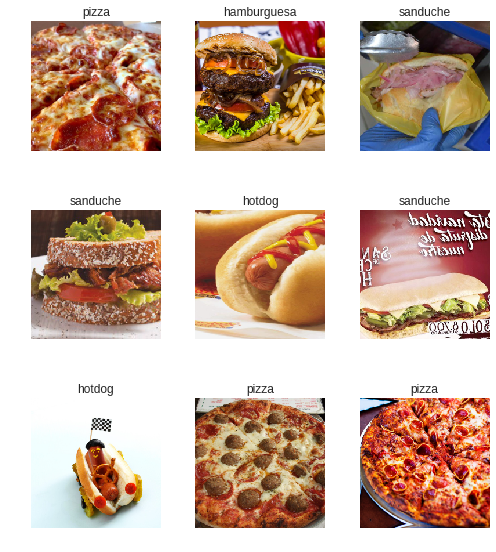

In [62]:
data.show_batch(rows=3, figsize=(7,8))

In [63]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['hamburguesa', 'hotdog', 'pizza', 'sanduche'], 4, 299, 74)

In [64]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
87306240it [00:01, 66025000.05it/s]


In [65]:
learn.fit_one_cycle(4)

In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [68]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 6.31E-05


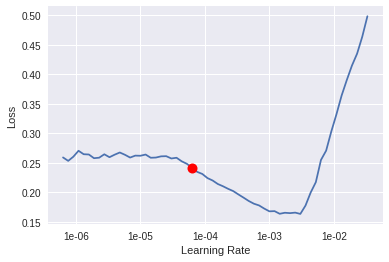

In [69]:

learn.recorder.plot()

In [70]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

In [0]:
learn.save('stage-2')

In [0]:
learn.load('stage-2');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

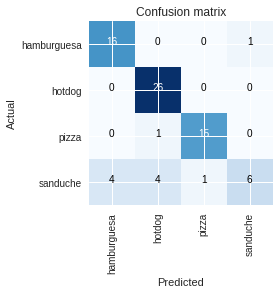

In [74]:
interp.plot_confusion_matrix()

In [75]:
data.classes

['hamburguesa', 'hotdog', 'pizza', 'sanduche']

In [76]:
#Se crea directorio para imagenes de validacion
destV = path/"validation"
print(destV)
destV.mkdir(parents=True, exist_ok=True)

data/validation


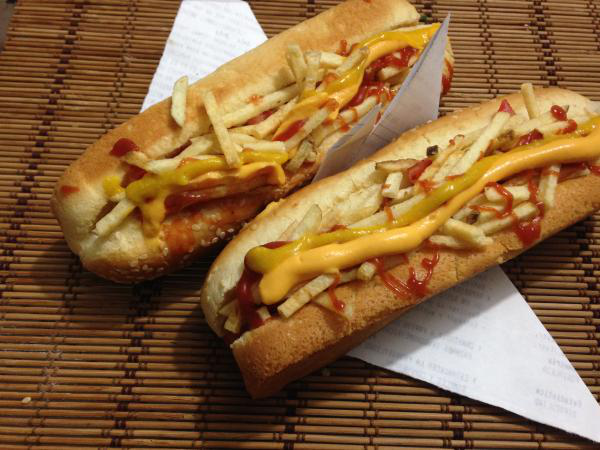

In [77]:
img = open_image(destV/'hotdog1.jpg')
img

In [0]:
learn.export()

In [0]:
learn = load_learner(path)

In [85]:
pred_class,pred_idx,outputs = learn.predict(img)
print('La categoria es:')
pred_class

La categoria es:


Category hotdog

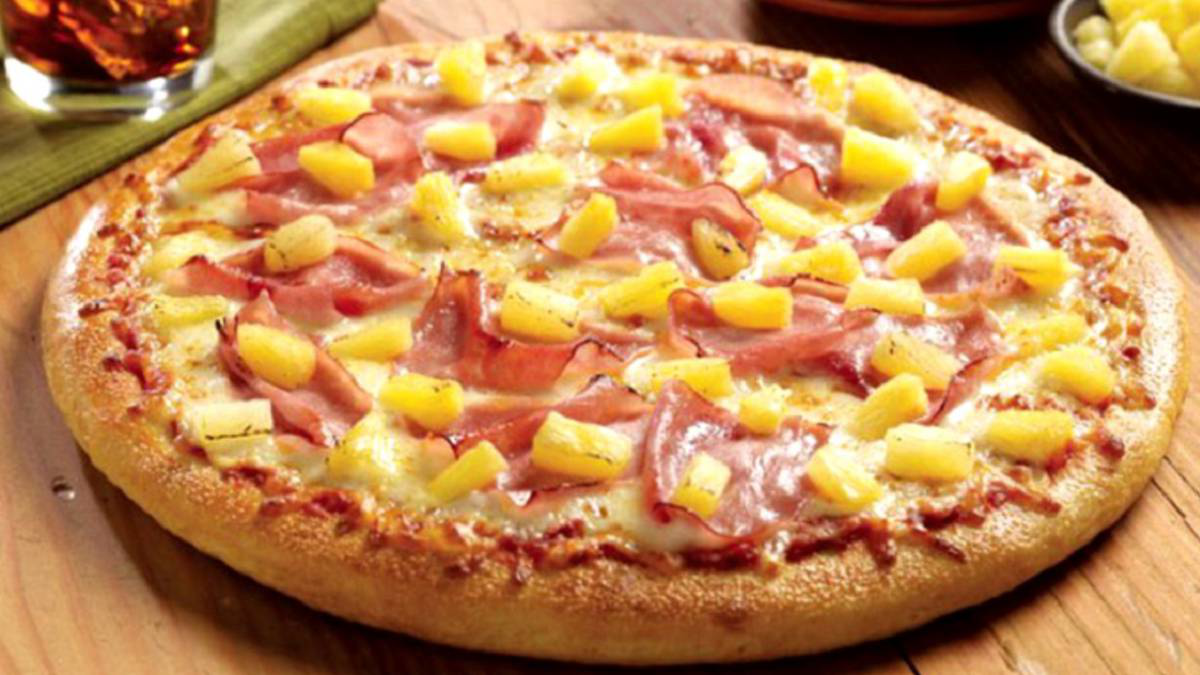

In [86]:
img = open_image(destV/'pizza1.jpg')
img

In [87]:
pred_class,pred_idx,outputs = learn.predict(img)
print('La categoria es:')
pred_class

La categoria es:


Category pizza

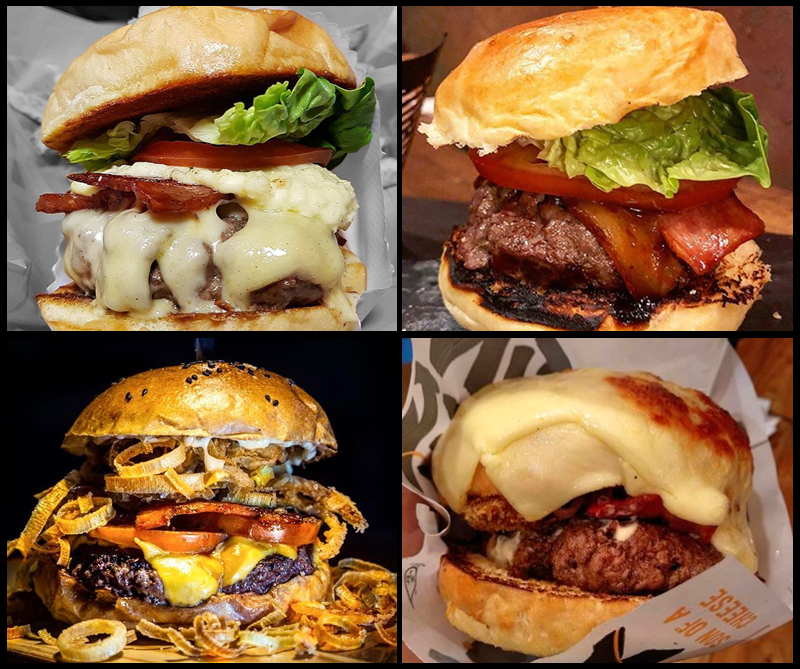

In [88]:
img = open_image(destV/'colombiana.jpg')
img

In [89]:
pred_class,pred_idx,outputs = learn.predict(img)
print('La categoria es:')
pred_class

La categoria es:


Category hamburguesa

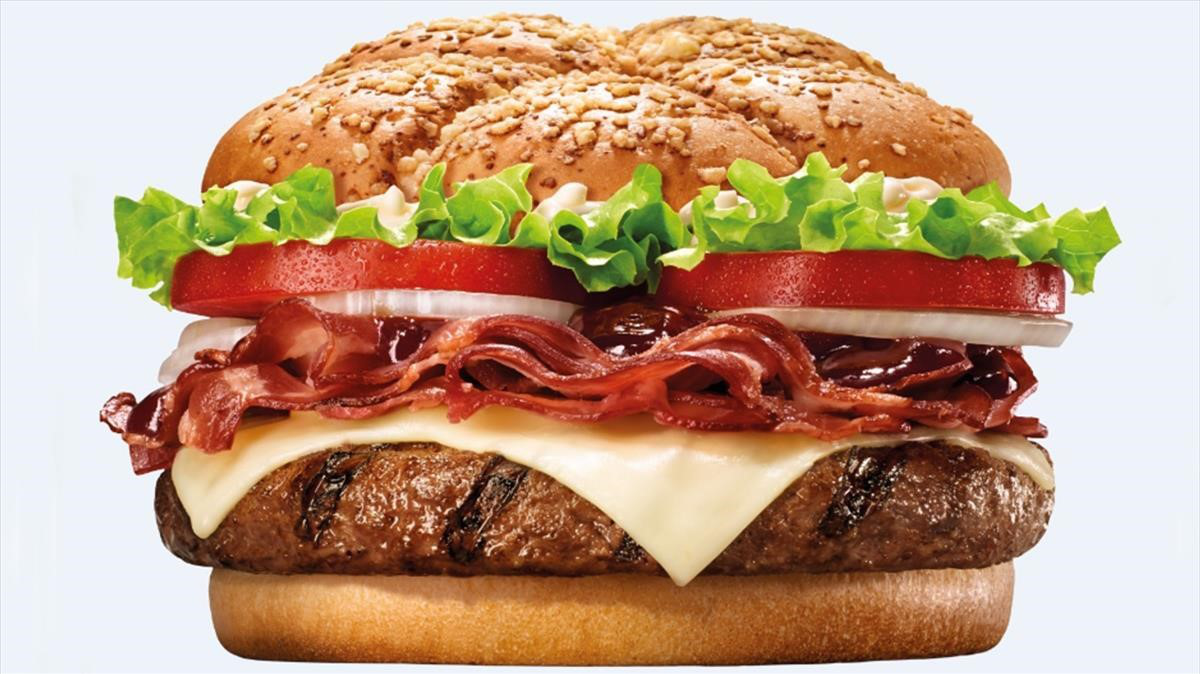

In [90]:
img = open_image(destV/'burgerking.jpg')
img

In [91]:
pred_class,pred_idx,outputs = learn.predict(img)
print('La categoria es:')
pred_class

La categoria es:


Category hamburguesa

In [0]:
#SIIIUUUUUUUUUUUUUUUUUUUUU :)

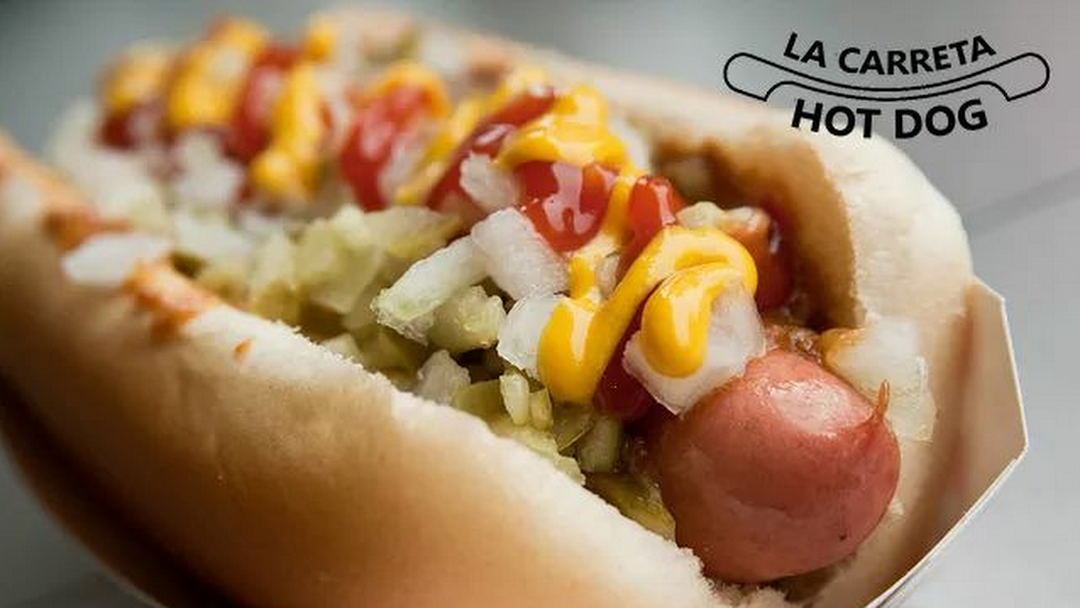

In [92]:
img = open_image(destV/'gyehotdog.jpg')
img

In [93]:
pred_class,pred_idx,outputs = learn.predict(img)
print('La categoria es:')
pred_class

La categoria es:


Category hotdog